In [207]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.ndimage.morphology as morphology
from skimage.morphology import disk

Rows, Columns, Channels: (750, 1596)


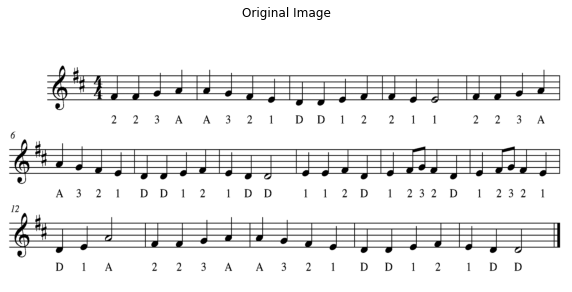

In [447]:
img = cv2.imread('otj_input.jpg',0)
print("Rows, Columns, Channels:",img.shape)
plt.figure(figsize=[10,10])
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

In [460]:
#segmentation 

#binarized using Otsu's Method after gaussian blurring
#blur = cv2.GaussianBlur(img,(5,5),0)
ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

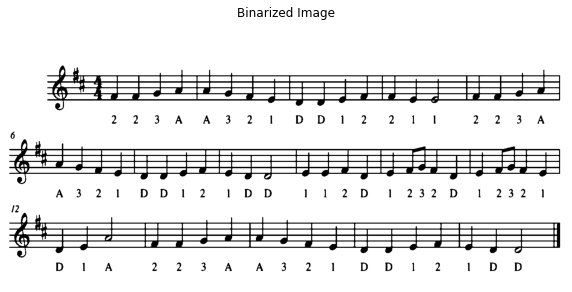

In [461]:
plt.figure(figsize=[10,10])
plt.imshow(th,cmap='gray')
plt.axis('off')
plt.title('Binarized Image')
plt.show()

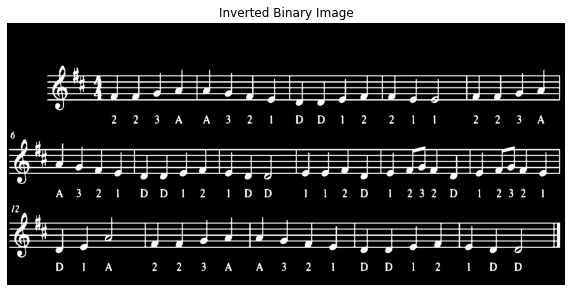

In [450]:
#Image Inversion
inv=255-th
plt.figure(figsize=[10,10])
plt.imshow(inv,cmap='gray')
plt.axis('off')
plt.title('Inverted Binary Image')
plt.show()

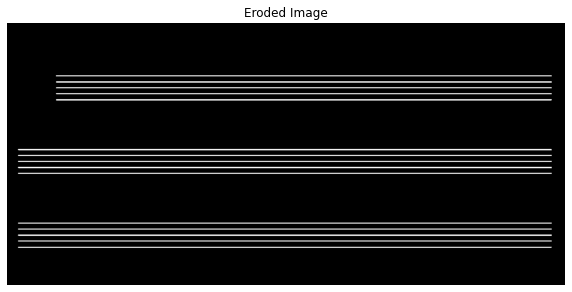

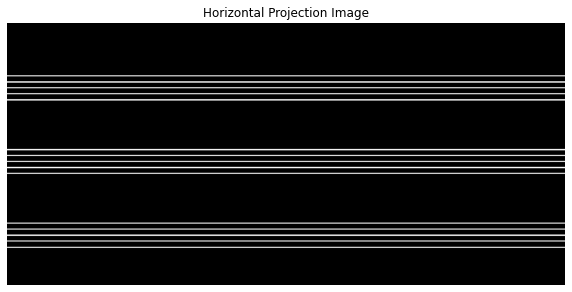

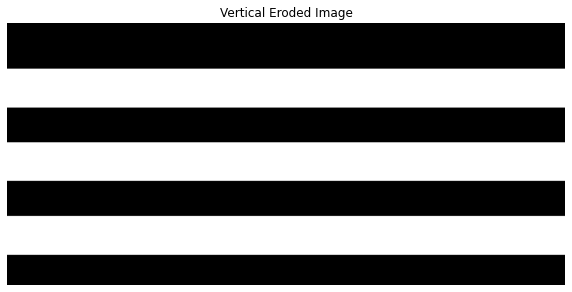

In [451]:
kernel = np.ones((1,50),np.uint8)
erosion = cv2.erode(inv,kernel,iterations = 1)
plt.figure(figsize=[10,10])
plt.imshow(erosion,cmap='gray')
plt.axis('off')
plt.title('Eroded Image')


m = img.shape[0]
w = img.shape[1]
colvector=cv2.reduce(erosion,1, cv2.REDUCE_AVG).reshape(-1)
m = img.shape[0]
w = img.shape[1]
result = np.zeros((m,w))

# Draw a line for each row
for row in range(m):
    if colvector[row]>0:
        cv2.line(result, (0,row), (w,row), (255), 1)
result.astype(np.uint8)
plt.figure(figsize=[10,10])
plt.imshow(result,cmap='gray')
plt.axis('off')
plt.title('Horizontal Projection Image')


kernel = np.ones((40,1),np.uint8)
vererosion = cv2.erode(255-result,kernel,iterations = 1)
vererosion=255-vererosion
vererosion=vererosion.astype(np.uint8)
ret,vererosion=cv2.threshold(vererosion,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=[10,10])
plt.imshow(vererosion,cmap='gray')
plt.axis('off')
plt.title('Vertical Eroded Image')


plt.show()

133
244
343
453
553
664
748


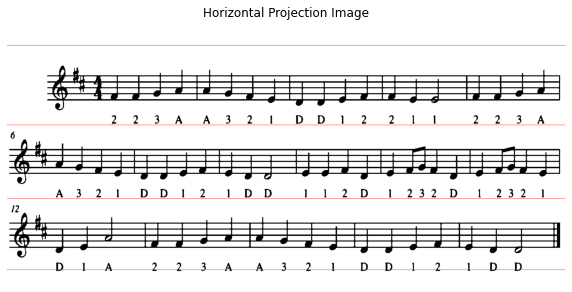

In [452]:
hist = cv2.reduce(vererosion,1, cv2.REDUCE_AVG).reshape(-1)

lines=[]
flag=0
start=0
H,W = img.shape[:2]
for y in range(H-1):
    if hist[y]==255 or y==H-2:
        if flag==0:
            lines.append(start+int((y-start)/2))
            print(y)
            flag=1
    elif hist[y]==0 and flag==1:
        flag=0
        start=y
        print(start)
        
bi=th
bi = cv2.cvtColor(bi, cv2.COLOR_GRAY2BGR)
for y in lines:
    cv2.line(bi, (0,y), (W, y), (255,0,0), 1)

plt.figure(figsize=[10,10])
plt.imshow(bi)
plt.axis('off')
plt.title('Horizontal Projection Image')
plt.show()

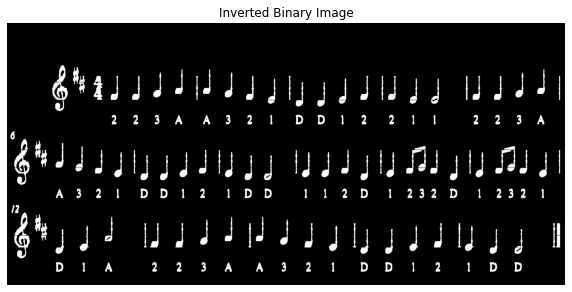

In [453]:
onlynotes=cv2.subtract(inv,result.astype(np.uint8))
kernel = np.ones((4,1),np.uint8)
onlynotes = cv2.erode(255-onlynotes,kernel,iterations = 1)
onlynotes=255-onlynotes
plt.figure(figsize=[10,10])
plt.imshow(onlynotes,cmap='gray')
plt.axis('off')
plt.title('Inverted Binary Image')
plt.show()

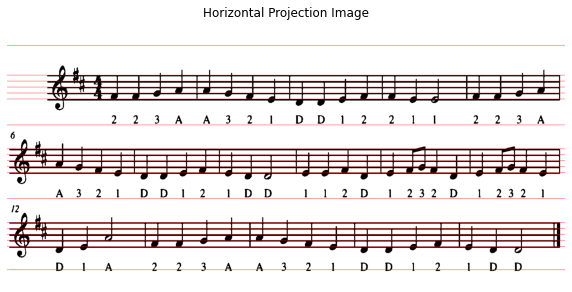

In [454]:
hist = cv2.reduce(result,1, cv2.REDUCE_AVG).reshape(-1)

staves=[]
flag=0
start=0
H,W = img.shape[:2]
for y in range(H-1):
    if hist[y]<1 and hist[y+1]>1:
        staves.append(y)
        

for y in staves:
    cv2.line(bi, (0,y), (W, y), (255,0,0), 1)

plt.figure(figsize=[10,10])
plt.imshow(bi)
plt.axis('off')
plt.title('Horizontal Projection Image')
plt.show()

In [169]:
staves

[118, 139, 161, 182, 203, 445, 467, 488, 509, 531, 774, 795, 816, 838, 859]

In [455]:
def binarize(img):
   #binarized using Otsu's Method after gaussian blurring
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
    #Image Inversion
    inv=255-th
    return inv,th

In [456]:
def imgsegments(inv):
    kernel = np.ones((1,50),np.uint8)
    erosion = cv2.erode(inv,kernel,iterations = 1)
    colvector=cv2.reduce(erosion,1, cv2.REDUCE_AVG).reshape(-1)
    m = inv.shape[0]
    w = inv.shape[1]
    result = np.zeros((m,w))

    # Draw a line for each row
    for row in range(m):
        if colvector[row]>0:
            cv2.line(result, (0,row), (w,row), (255), 1)
    result.astype(np.uint8)
    kernel = np.ones((40,1),np.uint8)
    vererosion = cv2.erode(255-result,kernel,iterations = 1)
    vererosion=255-vererosion
    vererosion=vererosion.astype(np.uint8)
    ret,vererosion=cv2.threshold(vererosion,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    hist = cv2.reduce(vererosion,1, cv2.REDUCE_AVG).reshape(-1)

    lines=[]
    flag=0
    start=0
    H,W = img.shape[:2]
    for y in range(H-1):
        if hist[y]==255 or y==H-2:
            if flag==0:
                lines.append(start+int((y-start)/2))
                #print(y)
                flag=1
        elif hist[y]==0 and flag==1:
            flag=0
            start=y
            #print(start)
            
    hist = cv2.reduce(result,1, cv2.REDUCE_AVG).reshape(-1)

    staves=[]
    flag=0
    start=0
    H,W = img.shape[:2]
    for y in range(H-1):
        if hist[y]<1 and hist[y+1]>1:
            staves.append(y)
    onlynotes=cv2.subtract(inv,result.astype(np.uint8))
    kernel = np.ones((4,1),np.uint8)
    onlynotes = cv2.erode(255-onlynotes,kernel,iterations = 1)
    onlynotes=255-onlynotes
    return staves,lines,onlynotes,inv


In [457]:
inv,th=binarize(img)
staves,lines,onlynotes,inv=imgsegments(inv)
lines

[66, 293, 503, 706]

In [458]:
def detectrest(crop_img,staff):    
    vertical_img = np.copy(crop_img)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,2))
    vertical_img = cv2.erode(vertical_img, kernel, iterations=1)
    vertical_img = cv2.dilate(vertical_img, kernel, iterations=1)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,4))
    vertical_img = cv2.erode(vertical_img, kernel, iterations=1)
    vertical_img = cv2.dilate(vertical_img, kernel, iterations=1)
    # variance
    s = np.var(vertical_img,axis=0)
    y = np.array(s)
    if staff==1:
        y[:650] = 0
    elif staff==2:
        y[len(y)-150:]=0
    elif staff==10:
        y[:250]=0
        y[len(y)-150:]=0
    maximum = np.max(y)
    maxi = np.where(y == maximum)
    #print(maxi)
    ma = maxi[0]
    # pixel location for rest
    init = ma[0] - 10
    fin = ma[0] + 10
    # masking objects other than rest
    result=np.copy(crop_img)
    if maximum>7000:
        result[:,0:init] = 0 
        result[:,fin:]=0
    else:
        result[:,:]=0
    return result
def halfnote(crop_img):
    im=crop_img
    im2=cv2.morphologyEx(im, cv2.MORPH_CLOSE, disk(3.5))
    plt.figure()
    plt.imshow(im2,cmap='gray')
    im2=im2-im
    im2=cv2.morphologyEx(im2, cv2.MORPH_OPEN, disk(2.5))
    kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(30,30))
    im2=cv2.morphologyEx(im2, cv2.MORPH_DILATE, disk(5))
    
    return im2
def quarternote(crop_img):
    im=crop_img
    im2=cv2.morphologyEx(im, cv2.MORPH_OPEN, disk(10))
    return im2
#def eighthnote(crop)

    

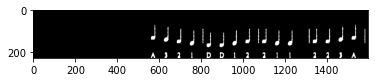

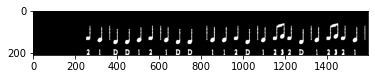

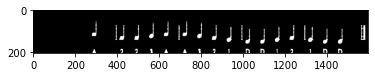

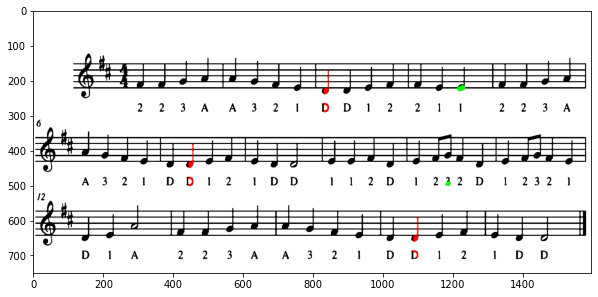

In [459]:
i=0
result = cv2.cvtColor(th,cv2.COLOR_GRAY2RGB)
while(i<len(lines)-1):
    if i==0:
        rest=detectrest(onlynotes[lines[i]:lines[i+1],:],1)
        backtorgb=np.copy(result[lines[i]:lines[i+1]])
        backtorgb[rest>0,0]=255
        backtorgb[rest>0,1]=0
        backtorgb[rest>0,2]=0
        temp=np.copy(onlynotes[lines[i]:lines[i+1]])
        temp[:,:550]=0
        half=halfnote(temp)
        backtorgb[half>0,0]=0
        backtorgb[half>0,1]=255
        backtorgb[half>0,2]=0
        quarter=quarternote(inv[lines[i]:lines[i+1]])
        backtorgb[quarter>0,0]=0
        backtorgb[quarter>0,1]=0
        backtorgb[quarter>0,2]=255
        result[lines[i]:lines[i+1]]=np.copy(backtorgb)
    elif i>0:
        rest=detectrest(onlynotes[lines[i]:lines[i+1],:],10)
        backtorgb=np.copy(result[lines[i]:lines[i+1]])
        backtorgb[rest>0,0]=255
        backtorgb[rest>0,1]=0
        backtorgb[rest>0,2]=0
        temp=np.copy(onlynotes[lines[i]:lines[i+1]])
        temp[:,:250]=0
        half=halfnote(temp)
        backtorgb[half>0,0]=0
        backtorgb[half>0,1]=255
        backtorgb[half>0,2]=0
        
        quarter=quarternote(inv[lines[i]:lines[i+1]])
        backtorgb[quarter>0,0]=0
        backtorgb[quarter>0,1]=0
        backtorgb[quarter>0,2]=255

        result[lines[i]:lines[i+1]]=np.copy(backtorgb)
        
    i=i+1
plt.figure(figsize=(10,10))
plt.imshow(result)